# LAB 12

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from matplotlib.pyplot import figure
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from time import time

np.random.seed(0) # fix random seed
tf.random.set_seed(0)

# ----------------------------------------- Esercizio 12.1 -----------------------------------------

L'esercizio consiste nel testare le prestazioni di una rete neurale sul database MNIST al variare dell'ottimizzatore utilizzato. In particolare, sono mostrate loss e accuracy per lo statistic gradient descent SGD, Adam e RMSprop.

In [2]:
tf.keras.backend.clear_session()

## Funzioni, parametri e dati

In [3]:
# Reshape dei dati, trasformazione in floats single precision, riscalamento nell'intervallo [0,1]
def prepare_data(array):
    array = array.reshape(array.shape[0], array.shape[1]*array.shape[2])
    return array.astype('float32')/255.

# Crea un DNN
def DNNmodel():
    model = models.Sequential()
    model.add(layers.Dense(400,input_shape=(pixel_rows*pixel_cols,), activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Crea e compila un DNN
def compile_model():
    model = DNNmodel()
    model.compile(loss=loss, optimizer=ottimizzatore, metrics=['accuracy'])
    return model

# Stampa loss e accuracy
def printLOSSACC():
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label='Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title("Model Loss")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.grid(True)
    ax.legend(loc=0)
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label='Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title("Model Accuracy")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    ax.legend(loc=0)
    fig.tight_layout()
    plt.show()

In [4]:
# Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
pixel_rows = train_images.shape[1]
pixel_cols = train_images.shape[2]
num_classes = 10

x_train = prepare_data(train_images)
y_train = to_categorical(train_labels)
x_test = prepare_data(test_images)
y_test = to_categorical(test_labels)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

# Parametri
loss = 'categorical_crossentropy'
batch_size = 32
epochs = 15

x_train shape: (60000, 784)
y_train shape: (60000, 10)


## ----------------------------------------- Ottimizzatore = 'SGD' -----------------------------------------

In [5]:
tf.keras.backend.clear_session()
ottimizzatore = 'sgd'
model1 = compile_model()
history = model1.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=True,
                     shuffle=True, validation_data = (x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7280 - accuracy: 0.7885 - val_loss: 0.3028 - val_accuracy: 0.9176
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3727 - accuracy: 0.8941 - val_loss: 0.2340 - val_accuracy: 0.9324
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3016 - accuracy: 0.9159 - val_loss: 0.1969 - val_accuracy: 0.9421
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2598 - accuracy: 0.9276 - val_loss: 0.1723 - val_accuracy: 0.9477
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2301 - accuracy: 0.9350 - val_loss: 0.1572 - val_accuracy: 0.9503
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2069 - accuracy: 0.9416 - val_loss: 0.1431 - val_accuracy: 0.9545
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1882 - accuracy: 0.9472 - val_loss: 0.1302 - val_accurac

313/313 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9720


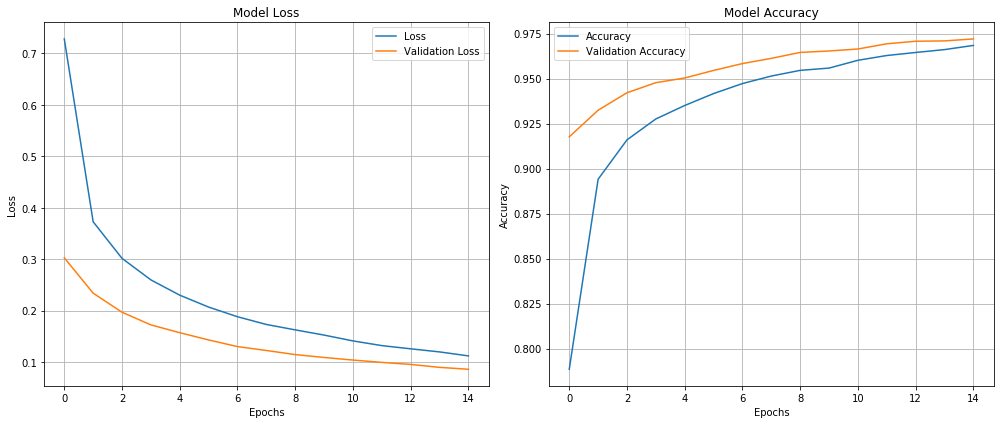

In [6]:
model1.evaluate(x_test, y_test)
printLOSSACC()

## --------------------------------------- Ottimizzatore = 'RMSprop' ---------------------------------------

In [7]:
tf.keras.backend.clear_session()
ottimizzatore = 'rmsprop'
model1 = compile_model()
history = model1.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=True,
                     shuffle=True, validation_data = (x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2790 - accuracy: 0.9194 - val_loss: 0.1165 - val_accuracy: 0.9678
Epoch 2/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1526 - accuracy: 0.9632 - val_loss: 0.1367 - val_accuracy: 0.9673
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1415 - accuracy: 0.9685 - val_loss: 0.1361 - val_accuracy: 0.9729
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1387 - accuracy: 0.9711 - val_loss: 0.1451 - val_accuracy: 0.9771
Epoch 5/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1420 - accuracy: 0.9714 - val_loss: 0.1454 - val_accuracy: 0.9777
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1475 - accuracy: 0.9725 - val_loss: 0.1729 - val_accuracy: 0.9754
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1560 - accuracy: 0.9739 - val_loss: 0.1963 - val_ac

313/313 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.9729


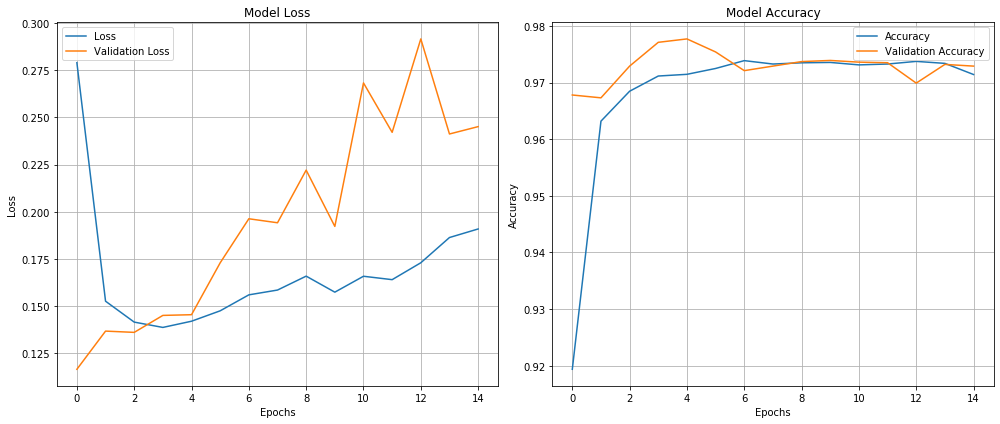

In [8]:
model1.evaluate(x_test, y_test)
printLOSSACC()

## ---------------------------------------- Ottimizzatore = 'Adamax' ----------------------------------------

In [9]:
tf.keras.backend.clear_session()
ottimizzatore = 'Adamax'
model1 = compile_model()
history = model1.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=True,
                     shuffle=True, validation_data = (x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4072 - accuracy: 0.8825 - val_loss: 0.1702 - val_accuracy: 0.9496
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1979 - accuracy: 0.9437 - val_loss: 0.1205 - val_accuracy: 0.9635
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1470 - accuracy: 0.9585 - val_loss: 0.0957 - val_accuracy: 0.9705
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1166 - accuracy: 0.9671 - val_loss: 0.0849 - val_accuracy: 0.9733
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0969 - accuracy: 0.9718 - val_loss: 0.0757 - val_accuracy: 0.9769
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0829 - accuracy: 0.9763 - val_loss: 0.0727 - val_accuracy: 0.9771
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0718 - accuracy: 0.9800 - val_loss: 0.0681 - val_accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0593 - accuracy: 0.9828


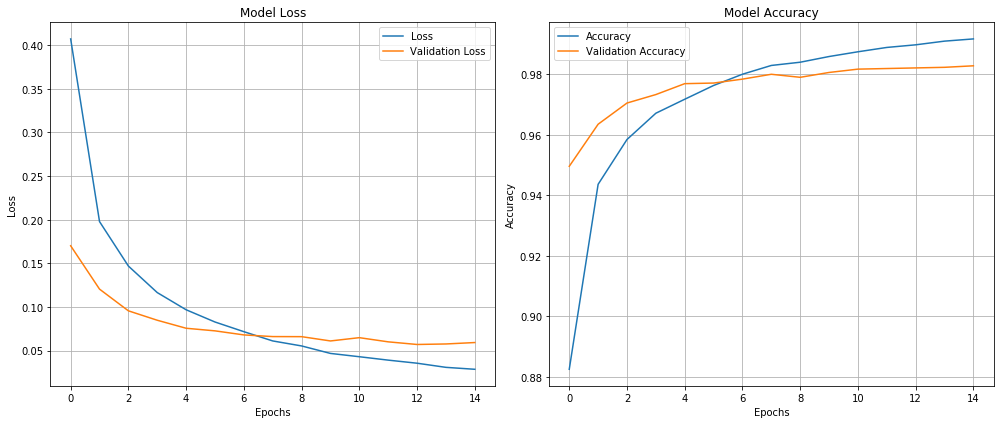

In [10]:
model1.evaluate(x_test, y_test)
printLOSSACC()

I grafici di loss e accuracy per tutti e tre i casi sono generati dopo l'addestramento 15 epoche.

Scegliendo SGD come ottimizzatore, la loss descresce all'aumentare delle epoche sia per i dati di training che per quelli di validazione mentre l'accuracy cresce. La validation loss decrescente con il numero di epoche indica che non sta avvenendo overfitting; si potrebbe quindi proseguire ancora con l'allenamento per migliorare i risultati.

Con RMSprop i valori della loss sono più bassi per tutti e due i set ma dopo un certo numero di epoche la validation loss inizia a crescere (overfitting); l'accuracy rimane alta al variare delle epoche.

Anche utilizzando Adamax possiamo notare che i valori della loss sono bassi ma che si registra comunque una divergenza tra le loss dopo 6 epoche; anche la distanza tra le accuracy cresce con le epoche, portando a pensare anche in questo caso a un overfitting.

SGD sembra essere la scelta più indicata per quanto riguarda l'ottimizzatore.


# ----------------------------------------- Esercizio 12.2 -----------------------------------------

In questo esercizio utilizziamo una rete neurale convoluzionale (CNN) per riconscere le cifre del dataset MNIST, come fatto con la DNN dell'esercizio precedente. La CNN sarà composta da layer convoluzionali, layer di pooling e layer completamente connessi; il layer di output sarà un layer completamente connesso formato da 10 unità (una per ogni cifra/classe rappresentata in MNIST).

In [11]:
def prepare_data_conv(array):
    if keras.backend.image_data_format() == 'channels_first':
        array = array.reshape(array.shape[0], 1, array.shape[1], array.shape[2])
        shape = (1, array.shape[1], array.shape[2])
    else:
        array = array.reshape(array.shape[0], array.shape[1], array.shape[2], 1)
        shape = (array.shape[1], array.shape[2], 1)
    return array.astype('float32')/255., shape


def create_CNN():
    model = models.Sequential()
    model.add(layers.Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3,3)))
    model.add(layers.Conv2D(16, (3,3), activation='relu',))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])
    return model

## --------------------------------------------------- CNN ---------------------------------------------------

In [12]:
x_train, input_shape = prepare_data_conv(train_images)
x_test, test_shape = prepare_data_conv(test_images)

print('x_train shape:', x_train.shape)
print('Y_train shape:', y_train.shape)
print()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 32
epochs = 10

x_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [13]:
CNN = create_CNN()
history = CNN.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                  verbose=True, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 46s 25ms/step - loss: 1.1765 - accuracy: 0.6007 - val_loss: 0.3921 - val_accuracy: 0.8764
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.4730 - accuracy: 0.8519 - val_loss: 0.2320 - val_accuracy: 0.9295
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3610 - accuracy: 0.8881 - val_loss: 0.1897 - val_accuracy: 0.9383
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3036 - accuracy: 0.9049 - val_loss: 0.1593 - val_accuracy: 0.9501
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2698 - accuracy: 0.9176 - val_loss: 0.1393 - val_accuracy: 0.9562
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2467 - accuracy: 0.9244 - val_loss: 0.1204 - val_accuracy: 0.9601
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2321 - accuracy: 0.9288 - val_loss: 0.1157 -

313/313 [==============================] - 1s 2ms/step - loss: 0.1069 - accuracy: 0.9645
Test loss: 0.1068611666560173
Test accuracy: 0.9645000100135803


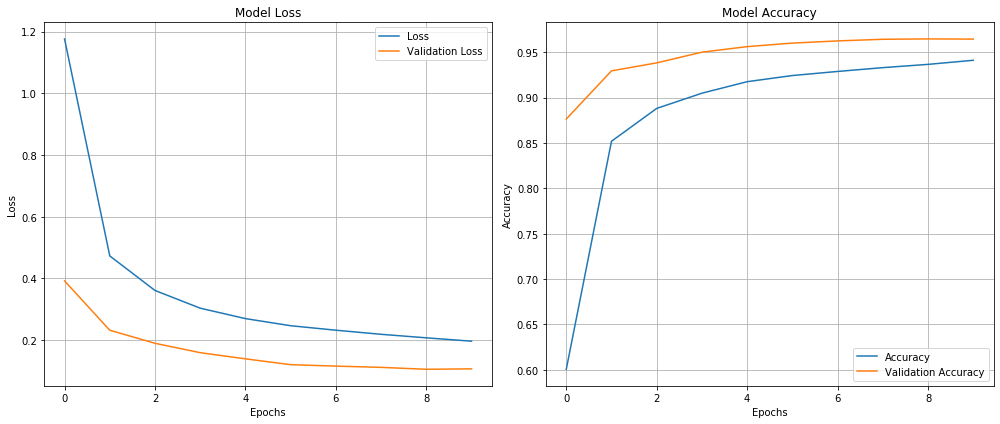

In [14]:
# Valutazione, loss e accuracy
results = CNN.evaluate(x_test, y_test)
print('Test loss:', results[0])
print('Test accuracy:', results[1])
printLOSSACC()

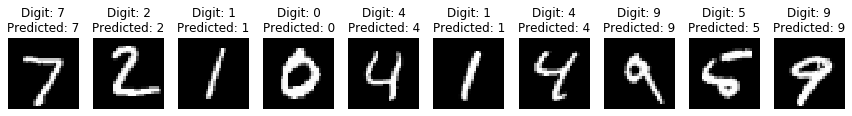

In [15]:
# Predictions
predictions = CNN.predict(x_test)
x_test = x_test.reshape(x_test.shape[0], pixel_rows, pixel_cols, 1)
fig = plt.figure(figsize=(15, 15))

for i in range(10):
    ax = fig.add_subplot(2, 10, i+1)   
    plt.imshow(x_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
    
plt.show()

# ----------------------------------------- Esercizio 12.3 -----------------------------------------

Test delle performance della CNN su delle cifre da 0 a 9, scritte da me utilizzando il programma GIMP.
Le performance della rete sono soddisfacenti, riesce infatti a riconoscere quasi tutte le cifre.

### Numeri scritti a mano

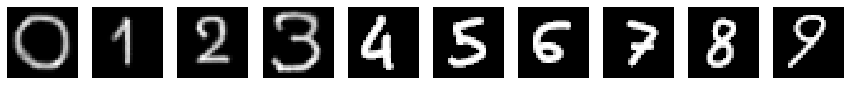

Data shape:  (28, 28)


In [16]:
from PIL import Image
import os

fig = plt.figure(figsize=(15, 15))
full_data = np.zeros((10,28,28))

for k in range(0,10):
    digit_filename = str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    pix = digit_in.load();
    data = np.zeros((28, 28))
    for j in range(28):
        for i in range(28):
            data[i,j] = pix[j,i]
    data /= 255
    plt.axis('off') 
    plt.subplot(1,10,k+1)
    plt.imshow(data, cmap='gray')
    full_data[k,:,:] = data[:,:]

plt.axis('off')
plt.show()
print("Data shape: ",data.shape)

## Test accuratezza

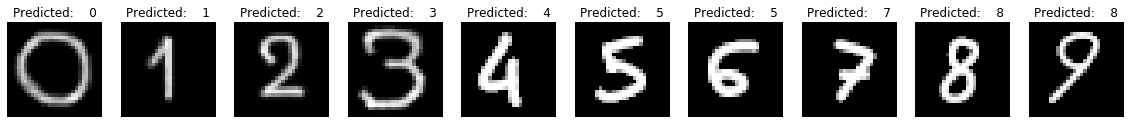

In [17]:
fig = plt.figure(figsize=(20, 3))

for k in range(10):
    digit_filename = str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    pix = digit_in.load();
    data = np.zeros((28, 28))
    for j in range(28):
        for i in range(28):
            data[i,j] = pix[j,i]
    data = data.reshape(1,28,28,1)
    pred_0 = CNN.predict(data)
    data = data.reshape(28,28)
    plt.subplot(1,10,k+1)
    plt.imshow(data, cmap='gray')    
    plt.title("Predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
plt.show()

### Cifre da ```MNIST```

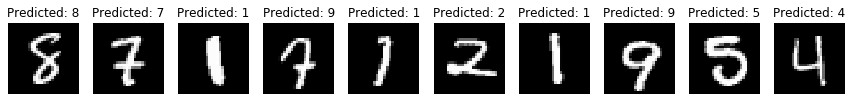

In [18]:
np.random.shuffle(x_test)
predictions = CNN.predict(x_test)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

fig = plt.figure(figsize=(15, 15))
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()